In [6]:
import sympy

sympy.init_printing()

The vector of conserved variables is $\mathcal{S} = (\rho,\rho\mathbf{u},\rho E)$
In the code, I'll use the _ to mean $\times$, e.g. rho_ux $= \rho \times$ $u_x$.
$F(\mathcal{S}) = (F_x(\mathcal{S}),F_y(\mathcal{S}),F_z(\mathcal{S}))$

$F_x(\mathcal{S}) = (\rho u_x,\left(\rho u_x\right)^2/\rho + p,\rho u_x \times \rho u_y/\rho,\rho u_x \times \rho u_z/\rho,\rho E \times \rho u_x/\rho + p \times \rho u_x/\rho)$
        $ = (S2,S2^2/S1 + p,S2 \times S3/S1,S2 \times S4/S1,S5 \times S2/S1 + p\times S2/S1)$

$F_y(\mathcal{S}) = (\rho u_y,\rho u_x \times \rho u_y/\rho,\left(\rho u_y\right)^2/\rho + p,\rho u_y \times \rho u_z/\rho,\rho E \times \rho u_y/\rho + p \times \rho u_y/\rho)$
        $ = (S3,S2 \times S3/S1,S3^2/S1 + p,S3 \times S4/S1,S5 \times S3/S1 + p\times S3/S1)$
        
$F_z(\mathcal{S}) = (\rho u_z,\rho u_x \times \rho u_z/\rho, \rho u_y \times \rho u_z/\rho,\left(\rho u_z\right)^2/\rho + p,\rho E \times \rho u_z/\rho + p \times \rho u_z/\rho)$
        $ = (S3,S2 \times S4/S1,S3 \times S4/S1,S4^2/S1 + p,S5 \times S4/S1 + p\times S4/S1)$

We will start in 1D where things are quite simple

$F_x\left(\mathcal{S}\right) = \left(\rho u_x, \left(\rho u_x\right)^2/\rho + p, \rho E \times \rho u_x/\rho + p \times \rho u_x/\rho \right) = (S2,S2^2/S1 + p,S5 \times S2/S1 + p \times S2/S1)$

$p = \left(\gamma - 1\right)\left(\rho E - \dfrac{1}{2} \left(\rho u_x\right)^2/\rho\right)$

$a^2 = \dfrac{\gamma p}{\rho} = \gamma \left(\gamma-1\right) \left( E - \dfrac{1}{2} u_x^2\right)$

In [98]:
def fluxAndJacobians1D(S1,S2,S5,u,E,gamma):

    p = sympy.symbols('p')
    
    ## EOS  p = (gamma - 1)*(rhoE - .5 rho u**2)
    p = (gamma - 1.)*(S5 - .5*(S2**2)/S1)
    
    ## Flux vectors
    F_x = sympy.Matrix( [S2, S2**2/S1 + p, S5*S2/S1 + p*S2/S1] )
    ## State vector
    S = sympy.Matrix( [S1,S2,S5] )
    
    ## flux Jacobian
    J_x = F_x.jacobian(S)
        
    J_x_prim = sympy.simplify(J_x.replace(S2,S1*u).replace(S5,S1*E))
    
    return F_x,J_x,J_x_prim

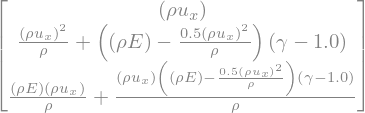

In [101]:
S1 = sympy.Symbol('rho')
S2 = sympy.Symbol(r'(\rho u_{x} )')
S5 = sympy.Symbol(r'(\rho E )')
gamma,a = sympy.symbols('gamma a')

## primitive variables

u = sympy.Symbol(r'u_{x}')
E = sympy.Symbol(r'E')

F_x,J_x,J_x_prim = fluxAndJacobians1D(S1,S2,S5,u,E,gamma)
F_x

We recognize the speed of sound and make an explicit substution.

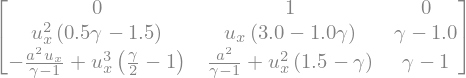

In [90]:
J_x_prim = J_x_prim.row_del(2)
newrow = sympy.Matrix([[(gamma/2 - 1)*u**3 - a**2*u/(gamma-1), 
                                  (3/2 - gamma)*u**2 + a**2/(gamma-1),
                                   gamma-1]])

J_x_prim = J_x_prim.row_insert(2,newrow)
J_x_prim

The eigenvalues of this matrix are $u_x - a$, $u_x$, $u_x + a$.

In [93]:
## Total specific enthalpy
H = .5 * u**2 + a**2/(gamma-1)
R_1D_ev = sympy.Matrix([ [1,1,1], [u - a, u, u + a], [H - u*a, .5*u**2, H + u*a]])

The corresponding eigenvectors are (right and left):

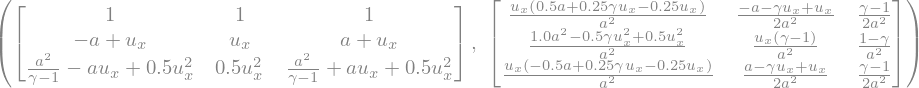

In [97]:
R_1D_ev , sympy.simplify(R_1D_ev.inv())

In [30]:
#S1,S2,S3,S4,S5 = sympy.symbols('rho,\rho u_x, rho_uy, rho_uz, rho_E')
S1 = sympy.Symbol('rho')
S2 = sympy.Symbol(r'(\rho u_{x} )')
S3 = sympy.Symbol(r'(\rho u_{y} )')
S4 = sympy.Symbol(r'(\rho u_{z} )')
S5 = sympy.Symbol(r'(\rho E )')
p,gamma = sympy.symbols('p gamma')

## EOS  p = (gamma - 1)*(rhoE - .5 rho u**2)
p = (gamma - 1.)*(S5 - .5*(S2**2 + S3**2 + S4**2)/S1)
c = sympy.sqrt(gamma*p/S1)
## Flux vectors
F_x = sympy.Matrix( [S2, S2**2/S1 + p, S2*S3/S1,     S2*S4/S1,     S5*S2/S1 + p*S2/S1] )
F_y = sympy.Matrix( [S3, S2*S3/S1,     S3**2/S1 + p, S2*S4/S1,     S5*S3/S1 + p*S3/S1] )
F_z = sympy.Matrix( [S4, S2*S4/S1,     S3*S4/S1,     S4**2/S1 + p, S5*S4/S1 + p*S4/S1] )

## State vector
S = sympy.Matrix( [S1,S2,S3,S4,S5] )

## internal energy per unit mass times (gamma - 1) is a^2 / gamma
ke = sympy.Symbol(r'E_K')
ue = sympy.Symbol(r'E_U')

KEVOL = (.5*S2**2 + .5*S3**2 + .5*S4**2)
UEVOL = S5 - ke

cleanup = lambda exp : exp.replace(KEVOL,ke*S1).replace(UEVOL,ue*S1).replace(ue,a**2/(gamma*(gamma-1.)))

## Flux jacobians
J_x,J_y,J_z = F_x.jacobian(S), F_y.jacobian(S), F_z.jacobian(S)

## Left eigenvectors
#L_x,L_y,L_z = ( J_x.transpose().eigenvects(), J_y.transpose().eigenvects(), 
#                J_z.transpose().eigenvects() )

## Right eigenvectors
#R_x,R_y,R_z = J_x.eigenvects(), J_y.eigenvects(), J_z.eigenvects()

## Eigenvalues
lam_x,lam_y,lam_z = J_x.eigenvals(), J_y.eigenvals(), J_z.eigenvals()

In [5]:
def conservedToPrimitive(expr,rho,u,v,w,E):
    ## a convenience function to get to the primitive variables in hopes of cleaning things up
    return sympy.simplify(expr.replace(S2,rho*u).replace(S3,rho*v).replace(S4,rho*w).replace(S5,rho*E))
    

In [ ]:
def primitiveSubSOS(expr,a):
    ## a convenience function to substitute in the speed of sound in hopes of cleaning things up (primitive filter alread applied)
    
    

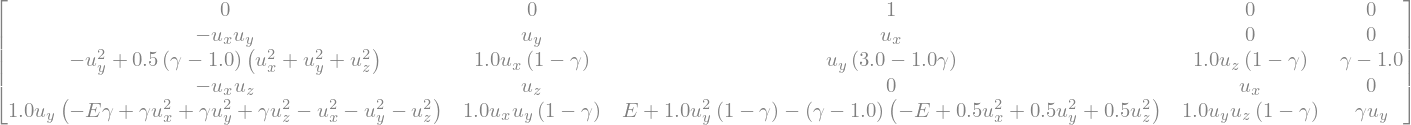

In [29]:
u = sympy.Symbol(r'u_{x}')
v = sympy.Symbol(r'u_{y}')
w = sympy.Symbol(r'u_{z}')
E = sympy.Symbol(r'E')
J_x_prim,J_y_prim,J_z_prim = conservedToPrimitive(J_x,S1,u,v,w,E),conservedToPrimitive(J_y,S1,u,v,w,E),conservedToPrimitive(J_z,S1,u,v,w,E)

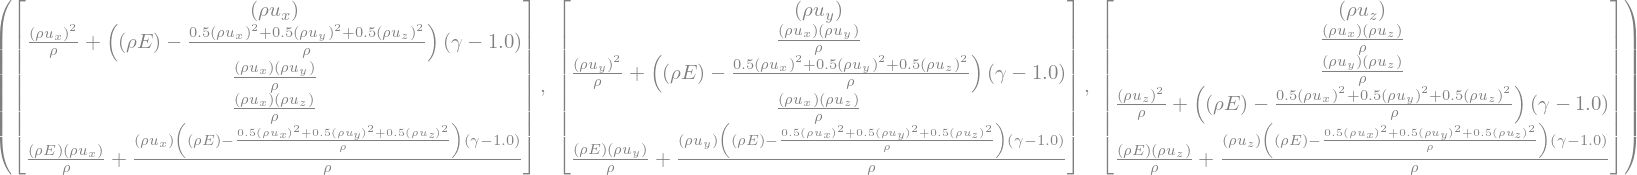

In [32]:
F_x,F_y,F_z

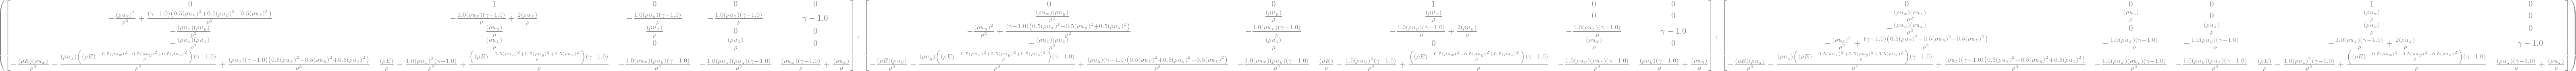

In [31]:
J_x,J_y,J_z

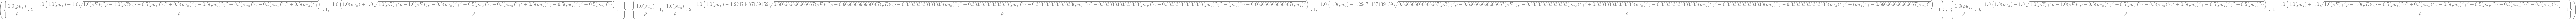

In [33]:
lam_x,lam_y,lam_z

The eigenvalues of the inviscid flux Jacobians are $u_i \pm a$ and $u_i$, where $a$ is the speed of sound.
$a^2 = \gamma \left( \gamma - 1 \right ) \left\{ \dfrac{\rho E}{\rho} - \dfrac{1}{2} \dfrac{\rho u_j \rho u_j}{\rho^2} \right\}$.